## Finding domain contrast in VDF images from different reflections

This notebook illustrates how VDF images can be generated from all
diffraction reflections in a SPED scan, and how domain contrast can be
calculated for all the resulting VDF images.



In [1]:
%matplotlib qt

In [2]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DP_f_2m1m10 = hs.load("/Users/anders/Library/CloudStorage/OneDrive-NTNU/Master/Data/2100F/22_03_23/hspy-files/SPED_128_128_spot1_alph5_CL12_tx2p7_ty2p0_1deg_step13p9nm.hspy", lazy = True)


In [4]:
#plot a single VDF image

roi = hs.roi.CircleROI(cx=-0.0037868, cy=-0.0106807, r= 0.000825327, r_inner=0)
DP_f_2m1m10.plot_integrated_intensity(roi)



In [5]:
# Get summed VSAD image from grain

VSA_apperture = hs.roi.CircleROI(cx=903.5, cy=1139.8, r=257.15, r_inner=0)

DP_f_2m1m10.plot()
VSA_apperture.add_widget(DP_f_2m1m10)


In [6]:
VSAD = DP_f_2m1m10.T.get_integrated_intensity(VSA_apperture)

VSAD.plot()

In [ ]:
peaks = VSAD.find_peaks(method="local_max", distance = 6, threshold=7.3, interactive=False)

[########################################] | 100% Completed |  3.8s


In [ ]:
#This cell gives a rough placement of VDF apertures based on peak finding
# The apertures need to be centered propperly and new ones added manually to 
# actually cover all diffraction reflections

VDF_appertures = []


for peak in peaks.data[0]:
    cy,cx = (np.array(peak) - VSAD.data.shape[0]//2)*DP_f_2m1m10.axes_manager[-1].scale
    roi = hs.roi.CircleROI(cx=cx,cy=cy,r=0.000825327, r_inner=0)
    
    VDF_appertures.append(roi)




In [ ]:
#plot all rois and center them

VSAD.plot()

for r in VDF_appertures:
    r.add_widget(VSAD)


In [ ]:
#See that we need to add 13 rois to cover all

for i in range(13):
    roi = hs.roi.CircleROI(cx=0,cy=0,r=0.000825327, r_inner=0)
    VDF_appertures.append(roi)


VSAD.plot()

for r in VDF_appertures:
    r.add_widget(VSAD)

In [7]:
#After manually adjusting the position of each VSA apperture



VDF_appertures_centered= [
    hs.roi.CircleROI(cx=-0.0116517, cy=0.00135936, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0116517, cy=-0.000291292, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0112633, cy=-0.00961263, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0112633, cy=0.00310711, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0111662, cy=-0.0113604, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.010972, cy=0.00679681, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0110691, cy=0.00514616, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.010972, cy=-0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0107778, cy=-0.00611713, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0104865, cy=-0.00417518, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0105836, cy=0.00854456, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0101952, cy=-0.00242743, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0102923, cy=0.0102923, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.010001, cy=-0.000679681, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00970973, cy=0.00135936, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00951554, cy=0.00301002, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00922424, cy=-0.00980683, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00922424, cy=0.00475777, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00903005, cy=-0.00815617, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00873876, cy=-0.00640842, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00903005, cy=0.00669971, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00893295, cy=0.00835037, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00854456, cy=0.0100981, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00864166, cy=-0.00446648, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00825327, cy=-0.00262163, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00805908, cy=-0.000776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00786488, cy=0.000970973, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00757359, cy=0.00281582, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0073794, cy=-0.0100981, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0072823, cy=0.00466067, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0071852, cy=0.00631133, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0071852, cy=-0.00825327, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00679681, cy=0.00805908, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00669971, cy=-0.00475777, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00689391, cy=-0.00640842, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00650552, cy=-0.00291292, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00631133, cy=0.010001, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00602003, cy=-0.00106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00602003, cy=0.000776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00572874, cy=0.00242743, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00514616, cy=0.00592294, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00534035, cy=0.00417518, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00524325, cy=-0.00873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00534035, cy=-0.0102923, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00495196, cy=-0.00689391, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00475777, cy=-0.00495196, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00485487, cy=0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00475777, cy=0.00980683, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00427228, cy=-0.00135936, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00446648, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00436938, cy=-0.00320421, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00407809, cy=0.000388389, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00388389, cy=0.00223324, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00320421, cy=0.00582584, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0035926, cy=0.00398099, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0034955, cy=-0.0105836, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00301002, cy=-0.00699101, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00330131, cy=-0.00873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00291292, cy=0.00767069, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00281582, cy=-0.00524325, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00281582, cy=0.00932134, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00252453, cy=0.0112633, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00262163, cy=-0.0034955, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00233034, cy=-0.00165065, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00184485, cy=0.00194195, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00213614, cy=9.70973E-05, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00165065, cy=-0.010972, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00165065, cy=0.0036897, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00145646, cy=0.00553455, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00135936, cy=-0.00912715, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00116517, cy=0.0073794, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00116517, cy=-0.0072823, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00106807, cy=-0.00553455, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000873876, cy=0.00912715, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000776778, cy=-0.0036897, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000679681, cy=0.010972, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000388389, cy=-0.00184485, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000291292, cy=-9.70973E-05, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-9.70973E-05, cy=0.00184485, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000194195, cy=-0.0112633, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000194195, cy=0.0034955, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000485487, cy=-0.00922424, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000679681, cy=-0.00757359, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000582584, cy=0.00543745, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000873876, cy=0.0071852, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000970973, cy=-0.00572874, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000970973, cy=0.00883586, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00116517, cy=-0.00398099, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00126227, cy=-0.00213614, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00116517, cy=0.0106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00165065, cy=-0.000485487, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00194195, cy=-0.0112633, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00194195, cy=0.00135936, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00213614, cy=0.00330131, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00262163, cy=-0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00252453, cy=-0.00961263, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00252453, cy=0.00524325, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00271872, cy=0.00699101, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00281582, cy=0.00864166, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00310711, cy=0.0103894, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00291292, cy=-0.00602003, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00320421, cy=-0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00330131, cy=-0.00252453, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0035926, cy=-0.000776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00388389, cy=0.00106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00407809, cy=-0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00417518, cy=0.00320421, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00446648, cy=0.00495196, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00446648, cy=-0.0100981, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00446648, cy=-0.00796198, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00456357, cy=0.00669971, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00485487, cy=0.00854456, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00475777, cy=-0.00621423, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00504906, cy=-0.00446648, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00514616, cy=0.0100981, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00514616, cy=-0.00262163, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00553455, cy=-0.000873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00592294, cy=0.00106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00602003, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00611713, cy=0.00291292, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00631133, cy=0.00456357, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00660262, cy=0.00631133, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00640842, cy=-0.0101952, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00650552, cy=-0.00825327, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00689391, cy=-0.00631133, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00679681, cy=0.00825327, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0070881, cy=-0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0070881, cy=0.010001, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0071852, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0073794, cy=-0.00281582, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00757359, cy=-0.000873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00776778, cy=0.000679681, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00786488, cy=0.00242743, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00815617, cy=-0.0104865, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00815617, cy=0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00835037, cy=0.00611713, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00835037, cy=-0.00854456, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00854456, cy=-0.00679681, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00883586, cy=-0.00504906, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00864166, cy=0.00786488, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00903005, cy=-0.00320421, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00893295, cy=0.00970973, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00922424, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00932134, cy=-0.00126227, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00980683, cy=0.00223324, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00961263, cy=0.000485487, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00990393, cy=-0.0105836, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0103894, cy=0.00582584, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0102923, cy=-0.00883586, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0100981, cy=0.00407809, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0104865, cy=-0.00699101, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0106807, cy=0.00767069, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0108749, cy=0.00932134, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.010972, cy=0.0112633, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0110691, cy=-0.0034955, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0108749, cy=-0.00524325, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0113604, cy=-0.00145646, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0114575, cy=9.70973E-05, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0115546, cy=-0.0107778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00330131, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00961263, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00776778, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0036897, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0101952, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00844747, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0115546, cy=0.00388389, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0115546, cy=0.00203904, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00514616, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00631133, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00572874, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00757359, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00951554, cy=-0.0116517, r=0.000825327, r_inner=0),

]

VSAD.plot()

for roi in VDF_appertures_centered:
    roi.add_widget(VSAD)


Time to manually inspect all VDF images. Accept those with domain contrast (y)

Reject those with no domain contrast, or with dominated bending contrast

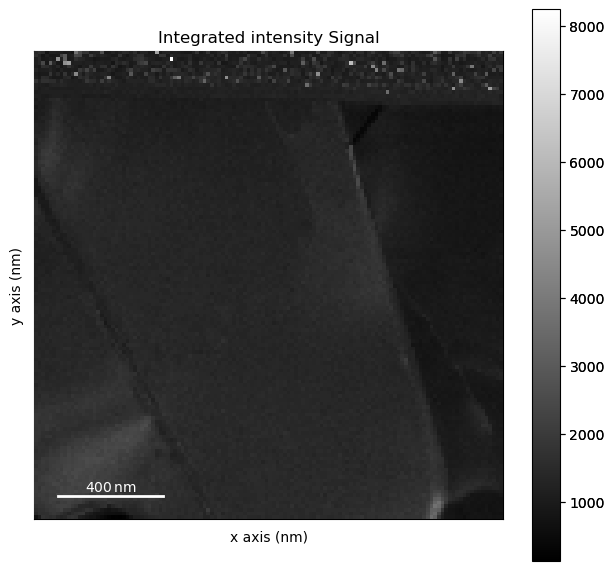

KeyboardInterrupt: Interrupted by user

In [8]:
%matplotlib inline
from IPython.display import display, clear_output

accepted_VDF_apertures = []

for roi in VDF_appertures_centered:
    VDF = DP_f_2m1m10.get_integrated_intensity(roi)
    VDF.plot()

    display(plt.gcf())
    plt.close()
    accept =  input("Accept image? (y): ")

    if accept == "y":
        accepted_VDF_apertures.append(roi)

    clear_output(wait=True)
    

In [10]:
#after accepting those with domain contrast you might get


VDF_rois_f_2m1m10 = [
hs.roi.CircleROI(cx=-0.0110691, cy=0.00689391, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0100981, cy=-0.00242743, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00970973, cy=0.00310711, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00912715, cy=0.00466067, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00864166, cy=-0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00883586, cy=-0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00883586, cy=0.00844747, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00893295, cy=-0.00602003, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00776778, cy=-0.0100981, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0072823, cy=-0.00805908, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0070881, cy=0.00640842, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00689391, cy=-0.00640842, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00669971, cy=-0.00456357, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00631133, cy=-0.00281582, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00582584, cy=0.00281582, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00543745, cy=0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00524325, cy=0.00621423, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00504906, cy=-0.00873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00504906, cy=0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00495196, cy=-0.0070881, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00466067, cy=0.00951554, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00427228, cy=-0.00126227, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00330131, cy=-0.00883586, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00339841, cy=-0.0105836, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00301002, cy=0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00271872, cy=-0.00514616, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00271872, cy=0.00932134, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00233034, cy=-0.00165065, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00252453, cy=0.0113604, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00203904, cy=0.00184485, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00174775, cy=-0.0106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00165065, cy=-0.00903005, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00116517, cy=-0.0073794, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000970973, cy=0.00922424, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000388389, cy=-0.00184485, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=9.70973E-05, cy=-0.010972, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=9.70973E-05, cy=0.00174775, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000582584, cy=-0.00912715, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000679681, cy=0.0071852, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000776778, cy=-0.00747649, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.000776778, cy=-0.00582584, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00126227, cy=0.0108749, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00194195, cy=0.00145646, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00174775, cy=-0.00203904, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00203904, cy=0.00330131, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00223324, cy=0.00504906, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00233034, cy=-0.00776778, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00252453, cy=-0.00980683, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00485487, cy=-0.00621423, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00436938, cy=-0.00980683, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00466067, cy=0.00679681, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00485487, cy=0.00854456, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00456357, cy=-0.00796198, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00514616, cy=-0.00436938, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00582584, cy=0.00301002, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00602003, cy=0.00456357, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00640842, cy=-0.010001, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00679681, cy=-0.00631133, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00660262, cy=0.00621423, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00669971, cy=0.00815617, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00815617, cy=0.00456357, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00990393, cy=0.00233034, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0110691, cy=-0.00339841, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00174775, cy=0.00398099, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00262163, cy=-0.00310711, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00116517, cy=-0.00388389, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.0034955, cy=-0.00223324, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00301002, cy=0.0104865, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.000873876, cy=0.010972, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00825327, cy=-0.00844747, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00951554, cy=0.000388389, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00825327, cy=0.00592294, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00757359, cy=0.000582584, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00669971, cy=-0.00446648, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00650552, cy=-0.00815617, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00592294, cy=-0.0116517, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00495196, cy=0.0115546, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=0.00281582, cy=0.00873876, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00145646, cy=0.00563164, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.0037868, cy=0.00223324, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00621423, cy=-0.00106807, r=0.000825327, r_inner=0),
hs.roi.CircleROI(cx=-0.00660262, cy=0.010001, r=0.000825327, r_inner=0)

]



In [11]:
print(len(VDF_rois_f_2m1m10))

82


In [12]:
%matplotlib qt
VSAD.plot()

for roi in VDF_rois_f_2m1m10:
    roi.add_widget(VSAD)

In [13]:
#plot a VDF image to place rois bright and dark in separate domains

roi_bright = hs.roi.CircleROI(cx=639.4, cy=695, r=201.55, r_inner=0)
roi_dark = hs.roi.CircleROI(cx=931.3, cy=1278.8, r=201.55, r_inner=0)

VDF = DP_f_2m1m10.get_integrated_intensity(VDF_rois_f_2m1m10[2])
VDF.plot()

roi_bright.add_widget(VDF)
roi_dark.add_widget(VDF)

In [14]:
contrasts = []

for roi in VDF_rois_f_2m1m10:
    VDF = DP_f_2m1m10.get_integrated_intensity(roi)

    sum1 = np.sum(np.array(roi_bright(VDF).nansum().data))
    sum2 = np.sum(np.array(roi_dark(VDF).nansum().data))

    if sum1 > sum2:
        sum_high = sum1
        sum_low =  sum2
    else:
        sum_high = sum2
        sum_low = sum1
        
    contrasts.append((sum_high-sum_low)/(sum_low+ sum_high))



    

In [15]:
plt.figure()
plt.scatter([0]*len(contrasts), contrasts)
plt.xlim([-5,90])

(-5.0, 90.0)

 Repeat for all 9 datasets in tiltseries to get the plot in my master thesis.